In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from cbrain.imports import *
from cbrain.utils import get2Didxs
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def global_mean(ds, var):
    return ds[var].mean(dim=('lat', 'lon', 'lev')) 

In [4]:
def plot_global_means(ds):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    axes[0].plot(global_mean(ds, 'TAP'))
    axes[1].plot(global_mean(ds, 'QAP'))
    plt.show()

In [5]:
def plot_time_lev(ds, var, func=np.mean, **kwargs):
    fig = plt.figure(figsize=(12, 5))
    plt.imshow(func(ds[var], axis=(2, 3)).T, **kwargs)
    plt.colorbar(shrink=0.3);
    plt.show()

In [6]:
def basics(debug, ref=False):
    if not ref: ds = xr.open_mfdataset(f'{DATA_DIR}*{debug}*', decode_times=False, decode_cf=False)
    else: ds = xr.open_mfdataset(f'{REF_DIR}AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-0[1-9]-00000.nc', 
                                 decode_times=False, decode_cf=False)
    ds=ds.isel(time=slice(0,-1))
    plot_global_means(ds)
    plot_time_lev(ds, 'TAP', np.max)
    plot_time_lev(ds, 'QAP', np.max)
    return ds

In [7]:
def normalize(x, m, s):
    return (x - m[:, None, None]) / s[:, None, None]

In [8]:
def gw_avg(ds, var):
    return (ds[var] * ds['gw']).mean(dim=('lat', 'lon'))

In [63]:
DATA_DIR = '/scratch/05488/tg847872/nnatmonly_fbp8_D003_andkua/'

In [ ]:
ds = xr.open_mfdataset(f'{DATA_DIR}*.h0*', decode_times=False)

In [ ]:
gw_avg(ds, 'TE').isel(time=slice(0, -2, 24)).plot()

In [12]:
d42 = xr.open_mfdataset(
    f'/scratch/05488/tg847872/cloudbrain_ctrl_aquaplanet_03/*debug42*.h1*', decode_times=False)

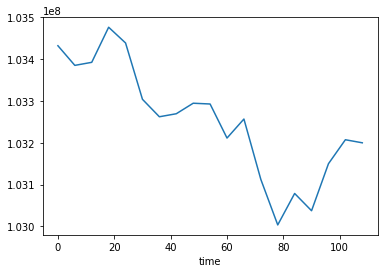

In [59]:
gw_avg(ds, 'TE').isel(time=slice(0, -2, 24)).plot()

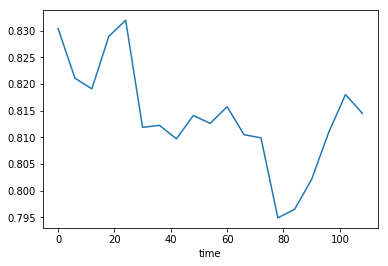

In [60]:
gw_avg(ds, 'TW').isel(time=slice(0, -2, 24)).plot()

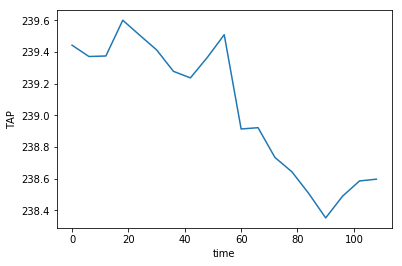

In [56]:
ds['TAP'].isel(time=slice(0, -2, 24)).mean(('lev', 'lat', 'lon')).plot()
#d42['TAP'].isel(time=slice(0, -2, 24)).mean(('lev', 'lat', 'lon')).plot();

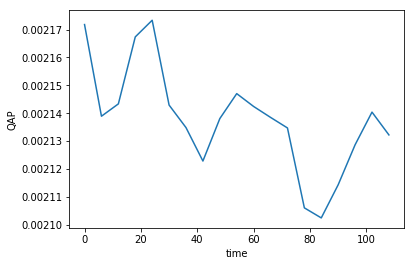

In [57]:
ds['QAP'].isel(time=slice(0, -2, 24)).mean(('lev', 'lat', 'lon')).plot()
#d42['QAP'].isel(time=slice(0, -2, 24)).mean(('lev', 'lat', 'lon')).plot();

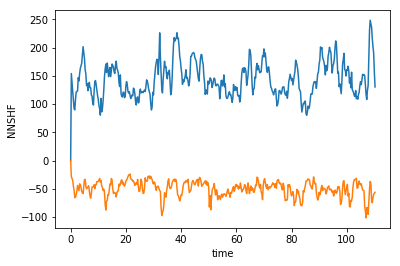

In [58]:
ds['NNSHF'].max(('lat', 'lon')).plot()
ds['NNSHF'].min(('lat', 'lon')).plot();

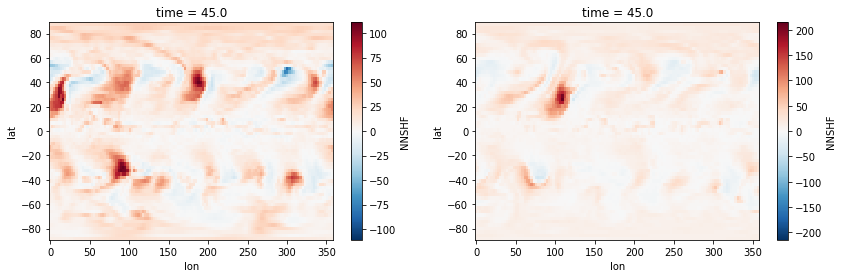

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['NNSHF'].sel(time=45).plot(ax=ax) for d, ax in zip([ds, d42], axes.flat)];

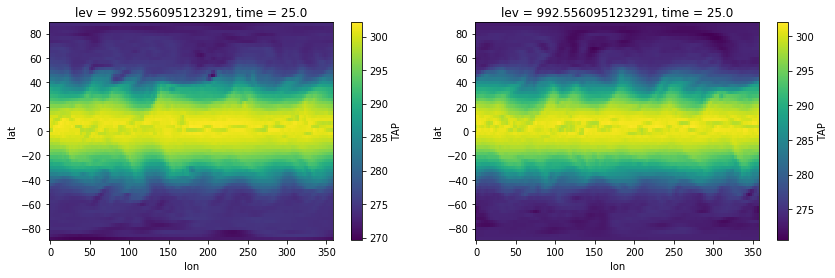

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['TAP'].isel(lev=-1).sel(time=25).plot(ax=ax) for d, ax in zip([ds, d42], axes.flat)];

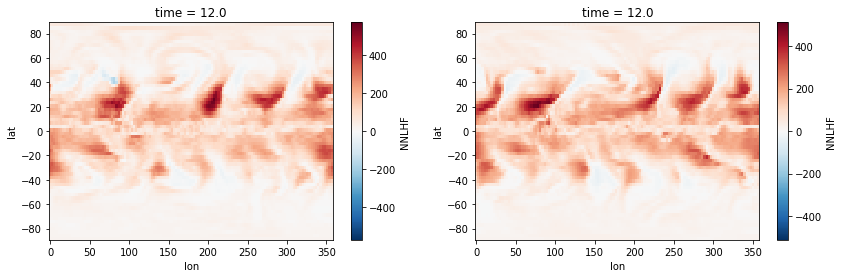

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['NNLHF'].sel(time=12).plot(ax=ax) for d, ax in zip([ds, d42], axes.flat)];

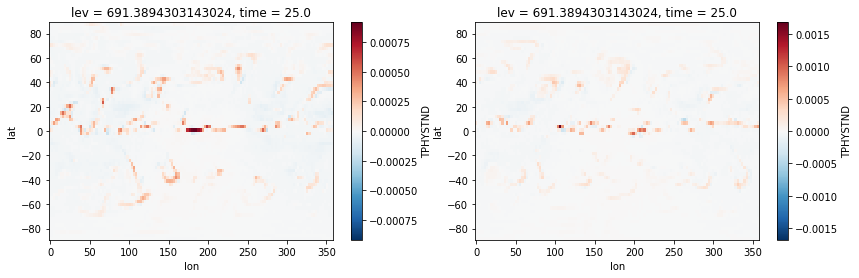

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['TPHYSTND'].sel(time=25).isel(lev=20).plot(ax=ax) for d, ax in zip([ds, d42], axes.flat)];

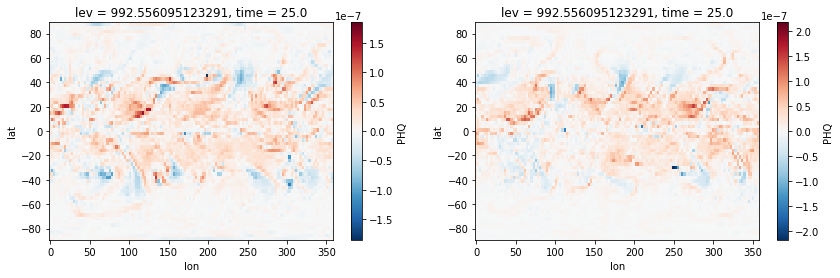

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['PHQ'].sel(time=25).isel(lev=-1).plot(ax=ax) for d, ax in zip([ds, d42], axes.flat)];

In [120]:
get2Didxs(ds['TPHYSTND'].sel(time=12).isel(lev=-1), np.argmin)

(46, 30)

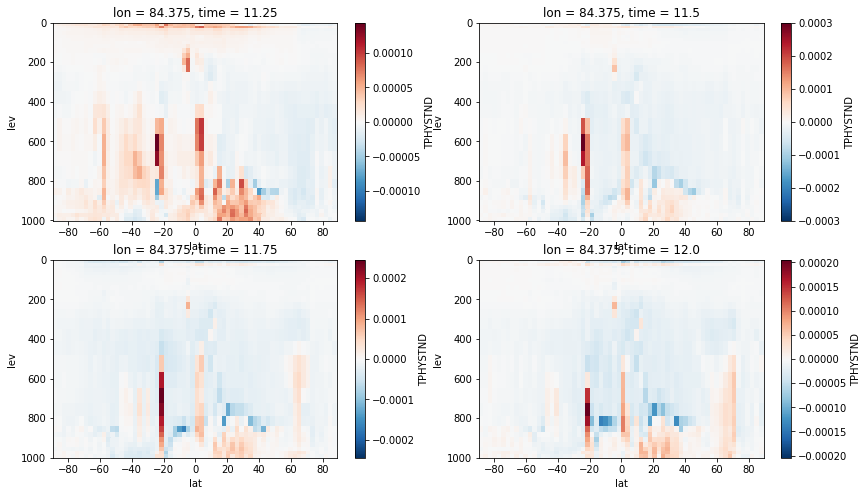

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
[ds['TPHYSTND'].sel(time=t).isel(lon=30).plot(ax=ax, yincrease=False) 
 for t, ax in zip(np.arange(11.25, 12.25, 0.25), axes.flat)];

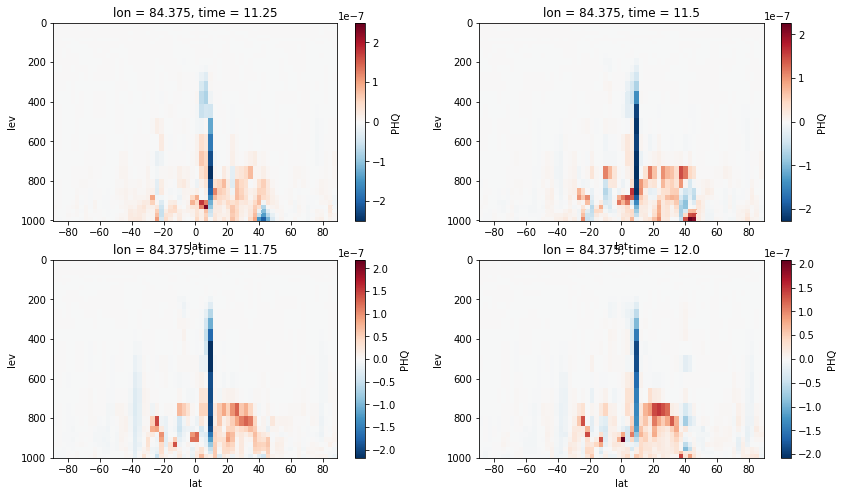

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
[ds['PHQ'].sel(time=t).isel(lon=30).plot(ax=ax, yincrease=False) 
 for t, ax in zip(np.arange(11.25, 12.25, 0.25), axes.flat)];

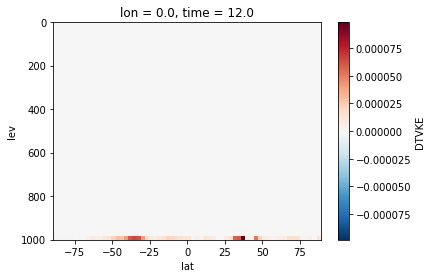

In [138]:
(ds['DTVKE']/1800.).sel(time=12).isel(lon=0).plot(yincrease=False)

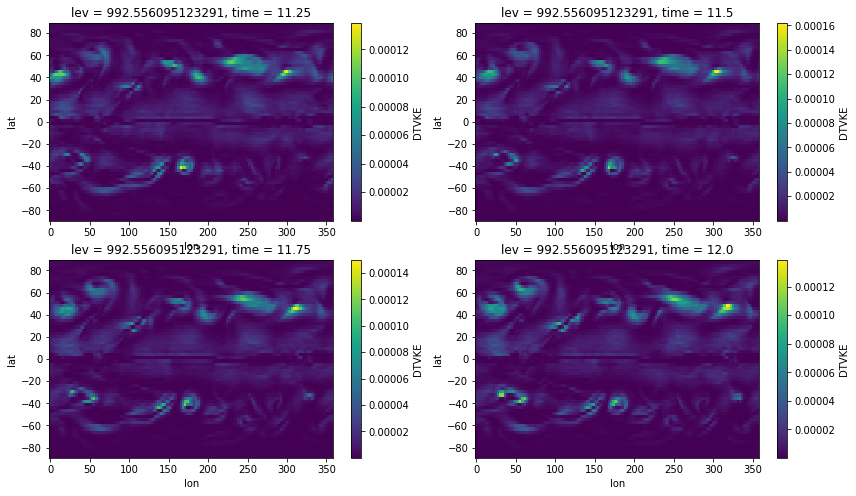

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
[(ds['DTVKE']/1800.).sel(time=t).isel(lev=-1).plot(ax=ax)
 for t, ax in zip(np.arange(11.25, 12.25, 0.25), axes.flat)];

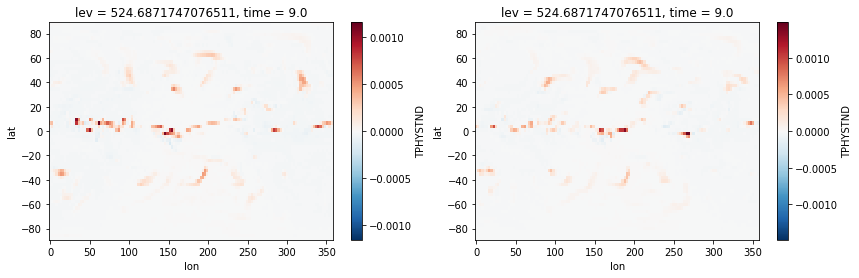

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['TPHYSTND'].sel(time=9).isel(lev=18).plot(ax=ax) 
 for d, ax in zip([ds, d42], axes.flat)];

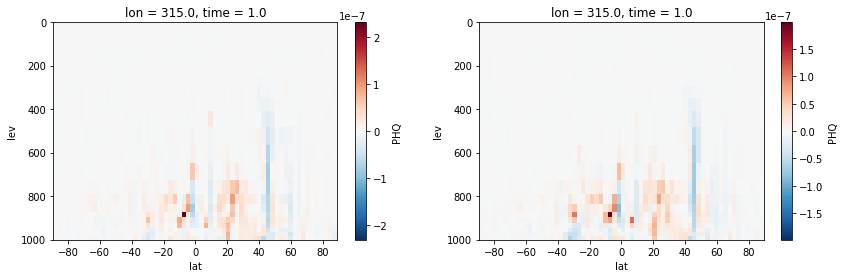

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['PHQ'].isel(time=48).sel(lon=316, method='nearest').plot(ax=ax, yincrease=False) 
 for d, ax in zip([ds, d42], axes.flat)];

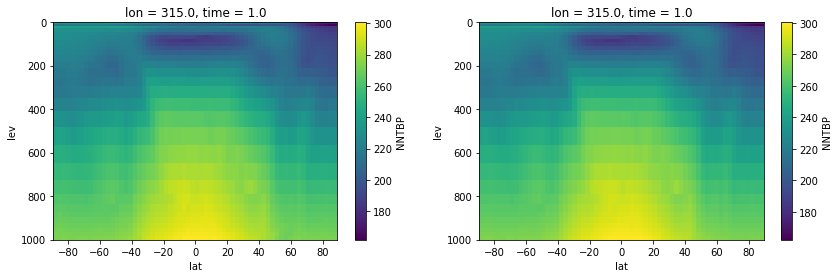

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['NNTBP'].isel(time=48).sel(lon=316, method='nearest').plot(ax=ax, yincrease=False) 
 for d, ax in zip([ds, d42], axes.flat)];

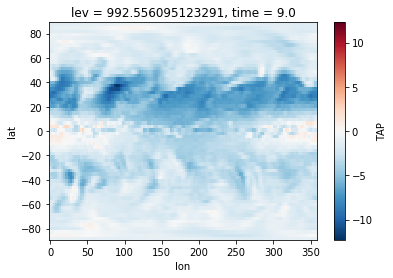

In [150]:
(ds['TAP'].sel(time=9) - d42['TAP'].sel(time=9)).isel(lev=-1).plot();

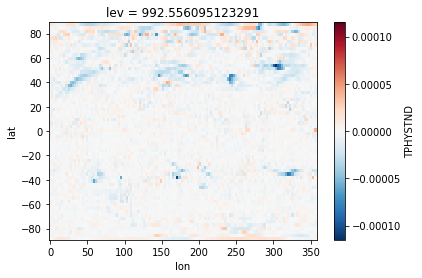

In [62]:
(ds['TPHYSTND'].isel(time=slice(0, 48)) - d42['TPHYSTND'].isel(time=slice(0, 48))).mean('time').isel(lev=-1).plot();

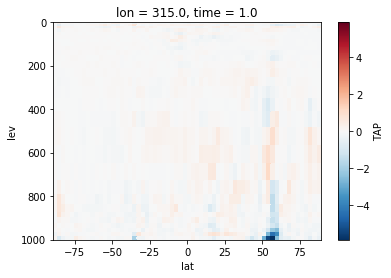

In [70]:
(ds['TAP'].isel(time=48) - d42['TAP'].isel(time=48)).sel(lon=316, method='nearest').plot(yincrease=False);

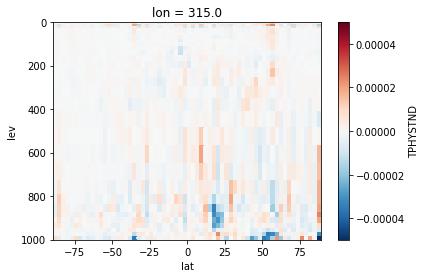

In [74]:
(ds['TPHYSTND'].isel(time=slice(0, 48)) - d42['TPHYSTND'].isel(time=slice(0, 48))).mean('time').sel(lon=316, method='nearest').plot(yincrease=False);

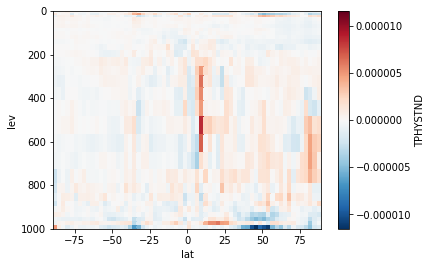

In [75]:
(ds['TPHYSTND'].isel(time=slice(0, 48)) - d42['TPHYSTND'].isel(time=slice(0, 48))).mean(('time', 'lon')).plot(yincrease=False);

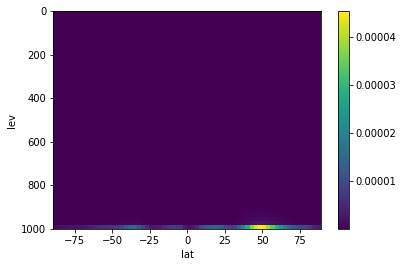

In [95]:
(ds['TPHYSTND'].isel(time=slice(0, 48)) - ds['NNDT'].isel(time=slice(0, 48))).mean(('time', 'lon')).plot(yincrease=False);

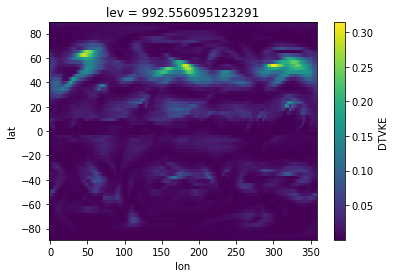

In [63]:
ds['DTVKE'].isel(time=slice(0, 48)).mean('time').isel(lev=-1).plot();

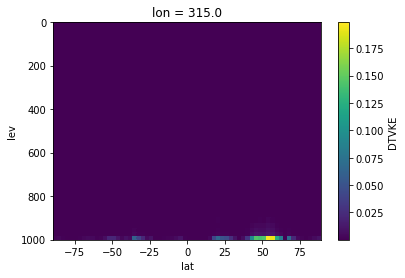

In [71]:
ds['DTVKE'].isel(time=slice(0, 48)).mean('time').sel(lon=316, method='nearest').plot(yincrease=False);

In [76]:
d42['DTVKE'].isel(time=slice(0, 48)).mean('time').sel(lon=316, method='nearest').plot(yincrease=False);

KeyError: 'DTVKE'

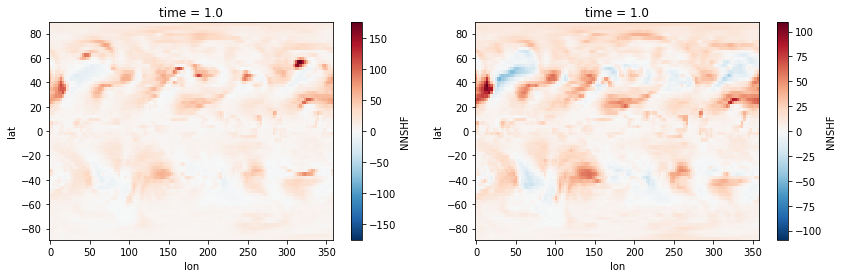

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['NNSHF'].isel(time=48).plot(ax=ax) for d, ax in zip([ds, d42], axes.flat)];

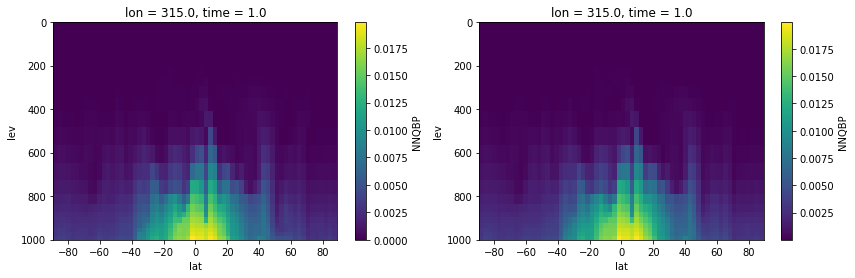

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['NNQBP'].isel(time=48).sel(lon=316, method='nearest').plot(ax=ax, yincrease=False) 
 for d, ax in zip([ds, d42], axes.flat)];

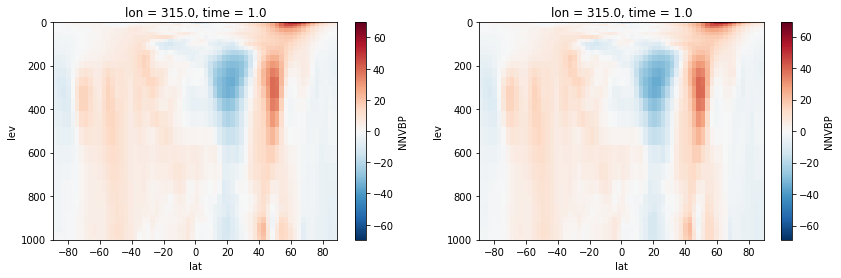

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
[d['NNVBP'].isel(time=48).sel(lon=316, method='nearest').plot(ax=ax, yincrease=False) 
 for d, ax in zip([ds, d42], axes.flat)];